In [1]:
#1-O que são dados categorizados?

In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'C:\\Users\\Matheus\\Documents\\GitHub\\Python-A-Z\\6 - Advanced Visualization'

In [4]:
movies = pd.read_csv('Movie-Ratings.csv')
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns = ('Film', 'Genre', 'CriticRating', \
                  'AudienceRating', 'BudgetMillion',\
                  'Year')
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [7]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [8]:
movies.Year = movies.Year.astype('category') #Transforma os objetos da coluna Ano em categorias.
movies.Genre = movies.Genre.astype('category')
movies.Film = movies.Film.astype('category')
#Categorizar colunas se torna prático pois existem datasets onde objetos são repetidos várias vezes.
#Categorizando-os torna possível fazer uma análise com mais propriedades
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [9]:
movies.Genre.cat.categories #A coluna gênero foi categorizada de acordo com cada tipo de filme

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

---

In [10]:
#Trabalhando com Jointplots

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

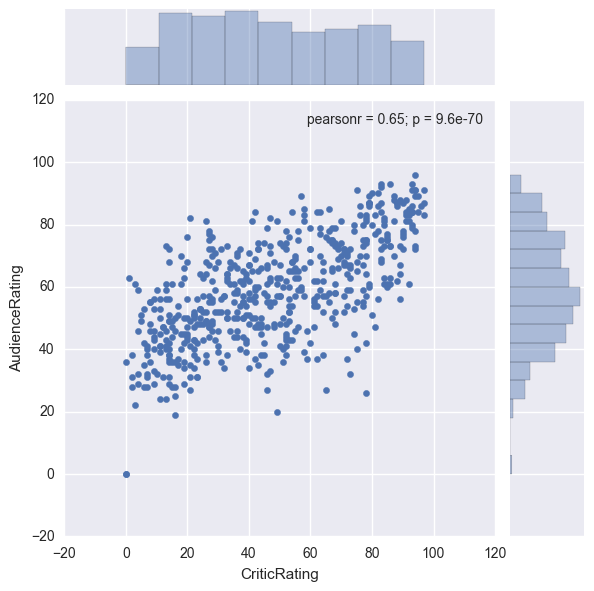

In [12]:
#Criando Jointplots. Jointplot é um scatterplot com distribuição
j = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating')

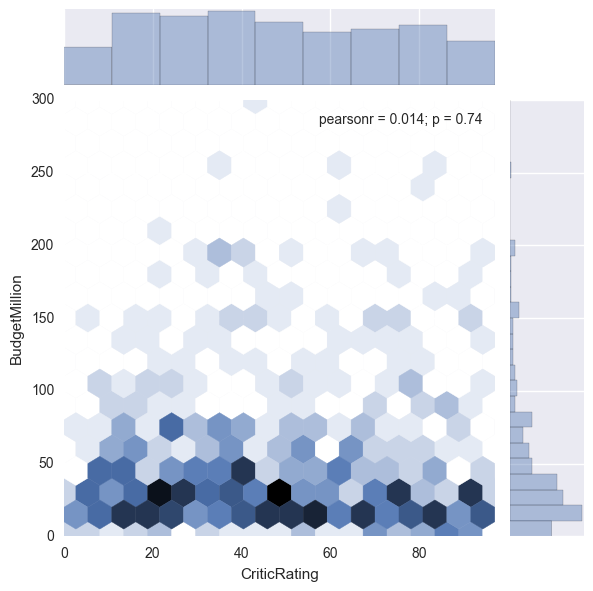

In [13]:
j = sns.jointplot(data=movies,x='CriticRating',y='BudgetMillion',
                  kind='hex') #kind é o tipo de gráfico. hex = hexagonal

In [14]:
movies[(movies.CriticRating >80)&(movies.BudgetMillion<50)]

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
3,127 Hours,Adventure,93,84,18,2010
9,50/50,Comedy,93,93,8,2011
13,A Serious Man,Drama,89,64,7,2009
17,Adventureland,Comedy,89,56,10,2009
26,An Education,Drama,94,78,8,2009
44,Beginners,Comedy,84,80,4,2010
47,Black Swan,Drama,88,86,13,2010
51,Bridesmaids,Comedy,90,77,33,2011
55,Buried,Drama,86,63,2,2010


In [15]:
len(movies[(movies.CriticRating>90)&(movies.BudgetMillion<10)])

7

In [16]:
#<<< Gráfico 1

---

In [17]:
#2 - Histogramas

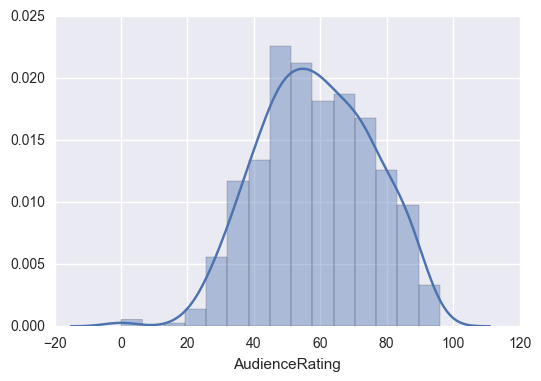

In [18]:
#Método já conhecido:
m1 = sns.distplot(movies.AudienceRating,bins=15)

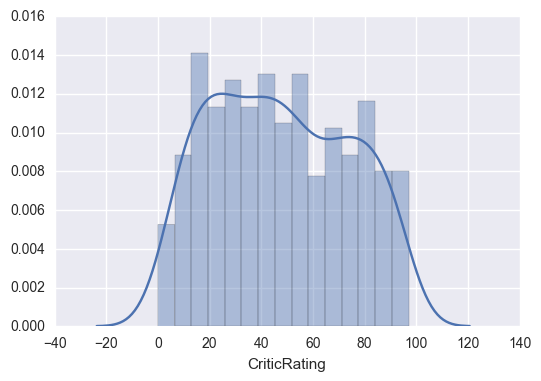

In [57]:
sns.set_style('darkgrid') #Coloca as linhas no gráfico
m2 = sns.distplot(movies.CriticRating,bins=15)

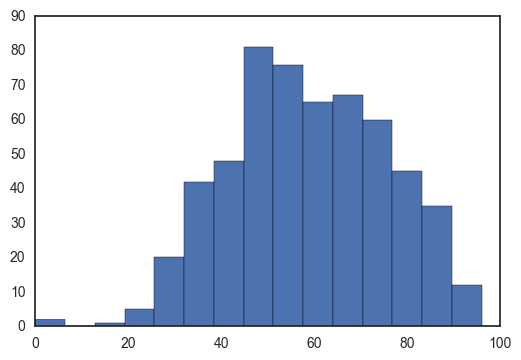

In [20]:
sns.set_style('white') #Remove as linhas
n1 = plt.hist(movies.AudienceRating, bins=15)

In [21]:
#<<< Gráfico 2

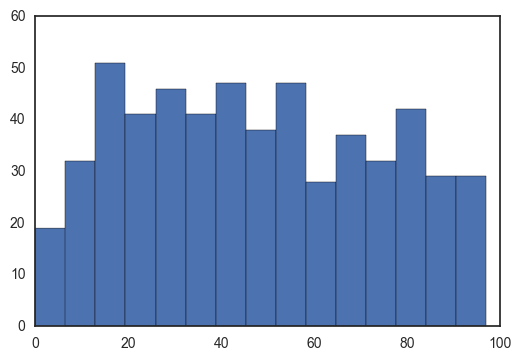

In [22]:
n2 = plt.hist(movies.CriticRating,bins=15)

---

In [23]:
#3 - Stacked Histograms - Histogramas Empilhados

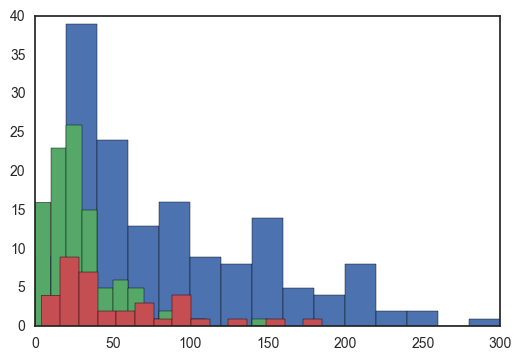

In [24]:
#Filtrando o dataset
plt.hist(movies[movies.Genre == 'Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion,bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion,bins=15)

plt.show()

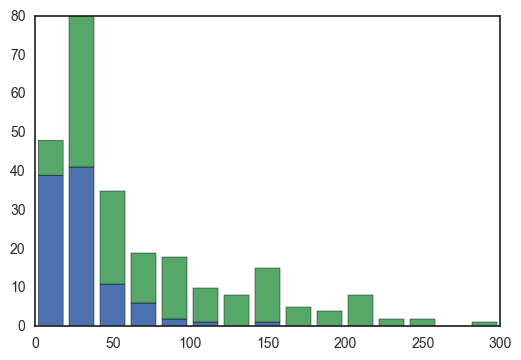

In [25]:
#Você coloca cada gênero em uma lista e depois coloca a lista dentro de plt.hist()
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillion, movies[movies.Genre == 'Action'].BudgetMillion],bins=15,stacked=True)
plt.show()

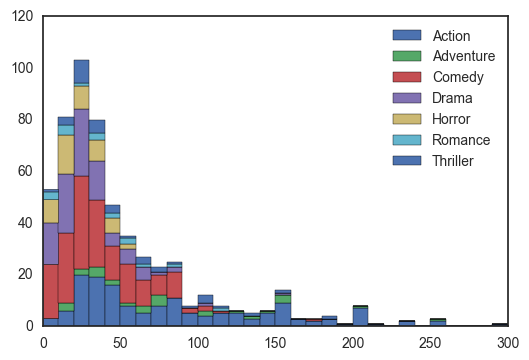

In [28]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    mylabels.append(gen)
    list1.append(movies[movies.Genre==gen].BudgetMillion)
plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels) #rwidith diz o espaço entre cada barra. 1 = 100% = no gap
plt.legend()
plt.show()

In [27]:
#<<<CHART 4

---

In [ ]:
#4 - Criando um KDE Plot (Kernel Density Estimate)

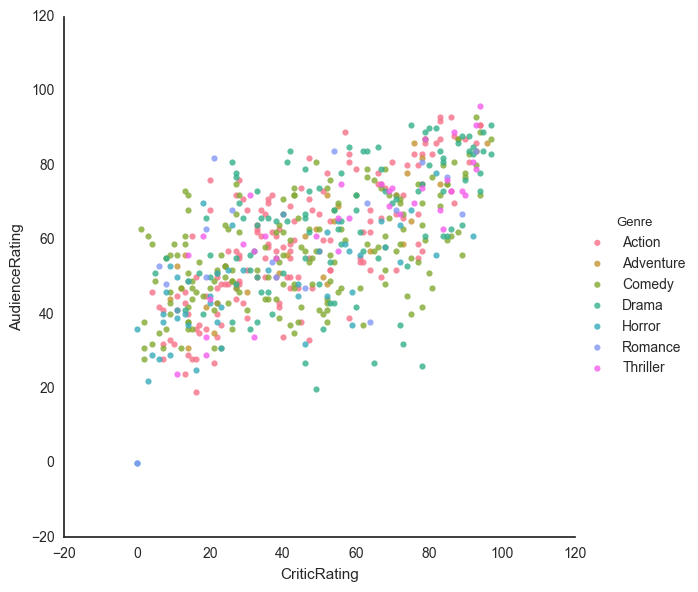

In [41]:
#Scatterplot
vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',\
                 fit_reg=False,hue='Genre',\
                 size = 6, aspect=1)

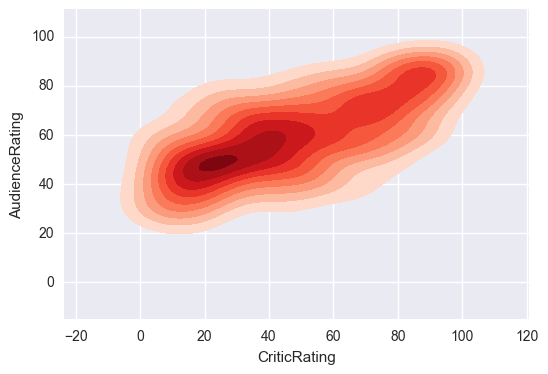

In [61]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Reds')
#Shade: sombras (preencheu o gráfico)
#Cmap = 'Reds': change the color pallete to red
#Shade_lowest = False: remove o fundo (grid)
#Quanto mais centralizado está o kernel, mais concentrada é a densidade


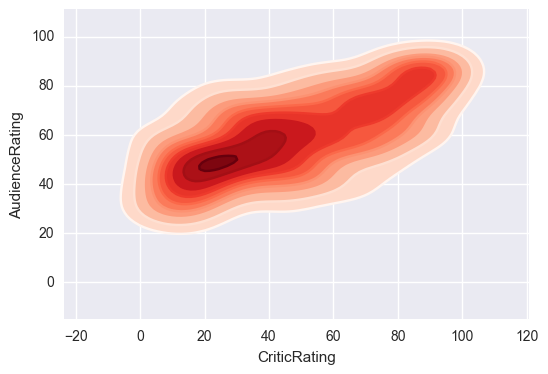

In [60]:
#DICA: Sobrepõe os dois gráficos. O com as linhas, facilitando ver os limites, e o com shade
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Reds')

k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='Reds')

---

In [62]:
#5 - Trabalhando com Subplots()

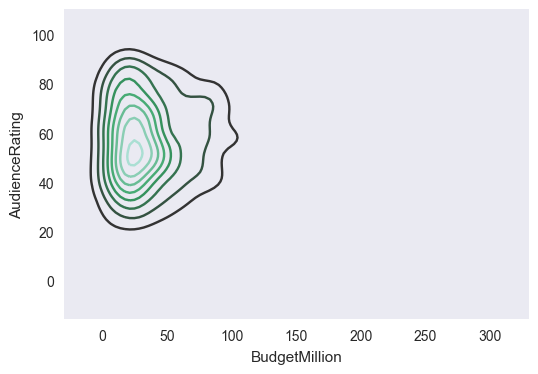

In [70]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating)

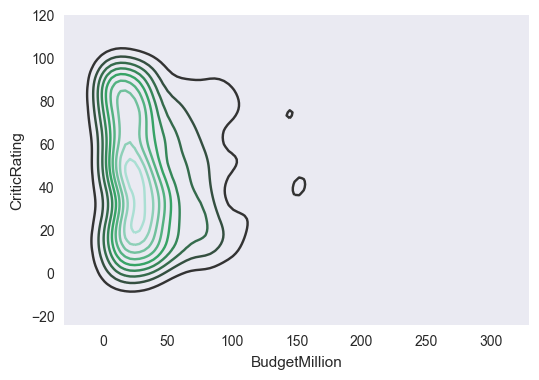

In [71]:
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating)

[(-20, 160)]

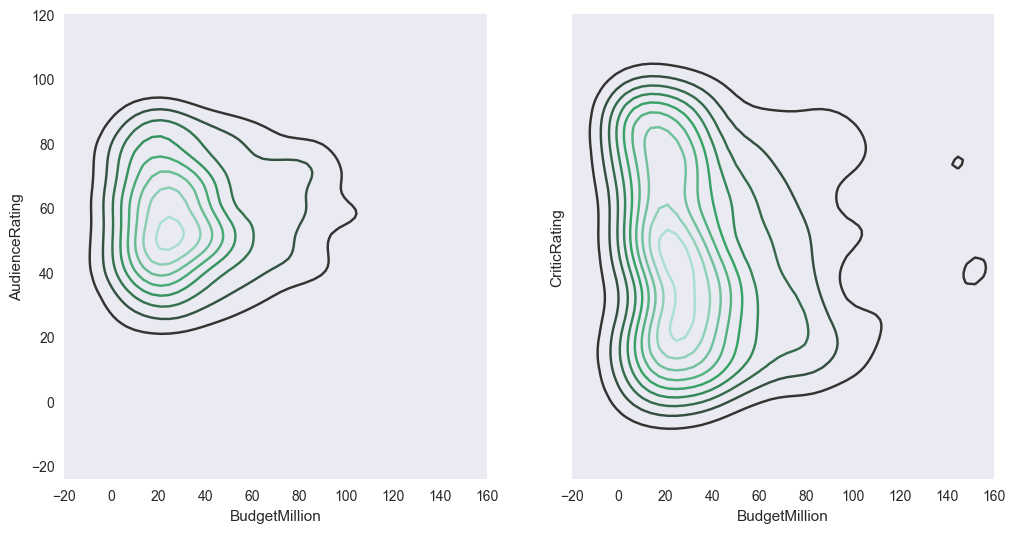

In [88]:
f, axes = plt.subplots(1,2, figsize=(12,6),sharex=True,sharey=True) #1 linha, 2 colunas; figsize(largura, altura)
#sharex ou sharey compartilha os valores dos eixos x ou y para ambas as figuras
#fig é um único objeto, o gráfico que está criando. ax pode ser tanto um único eixo ou um array de eixos
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160)) #limita o gráfico de -20 até 160

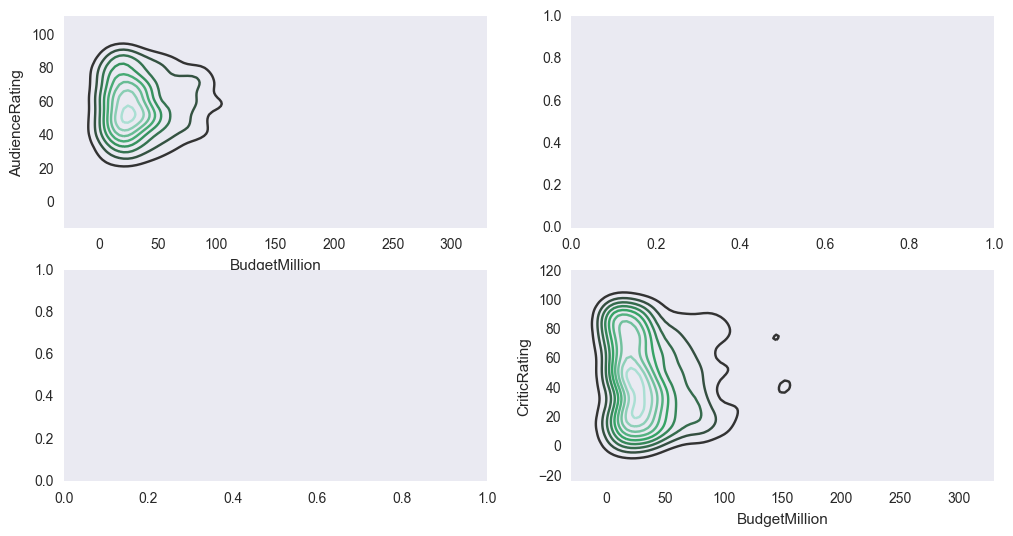

In [85]:
#O que acontece se o x e y do subplot() for 2 e 2?
f, axes = plt.subplots(2,2, figsize=(12,6)) #1 linha, 2 colunas; figsize(largura, altura)
#2 e 2 retorna quatro gráficos. Semelhante ao formato de uma matriz [2,2]
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0,0])#OBS: ax=axes[0,0]
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[1,1])